# Exercise 1 

In this exercise, we will use a deep neural network to predict the digit labels on the popular `mnist` data set. For more information, see this [link](https://en.wikipedia.org/wiki/MNIST_database)

### Exercise 1(a) (2 points)

Load the below libraries.

```
import matplotlib.pyplot as plt

import numpy as np
import tensorflow as tf
```

In [1]:
import matplotlib.pyplot as plt

import numpy as np
import tensorflow as tf

### Exercise 1(b) (3 points)

Load the `mnist` data as `train` and `test` data sets.

In [26]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

### Exercise 1(c) (5 points)

Visualize the first 5 digit images from the `train` data set.

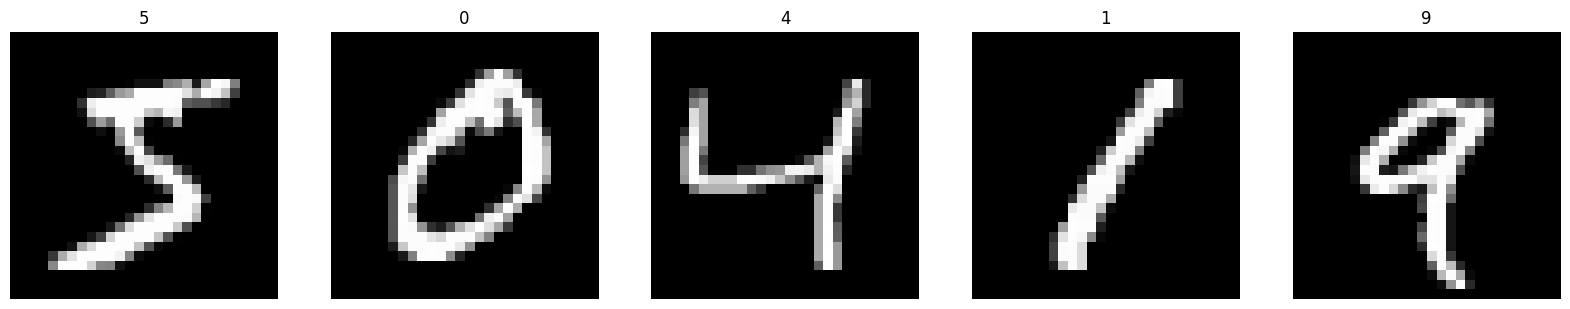

In [5]:
num_images = 5

fig, axes = plt.subplots(1, num_images, figsize=(20,20))
for i in range(num_images):
    axes[i].imshow(x_train[i], cmap='gray')
    axes[i].set_title(y_train[i])
    axes[i].axis('off')
plt.show()

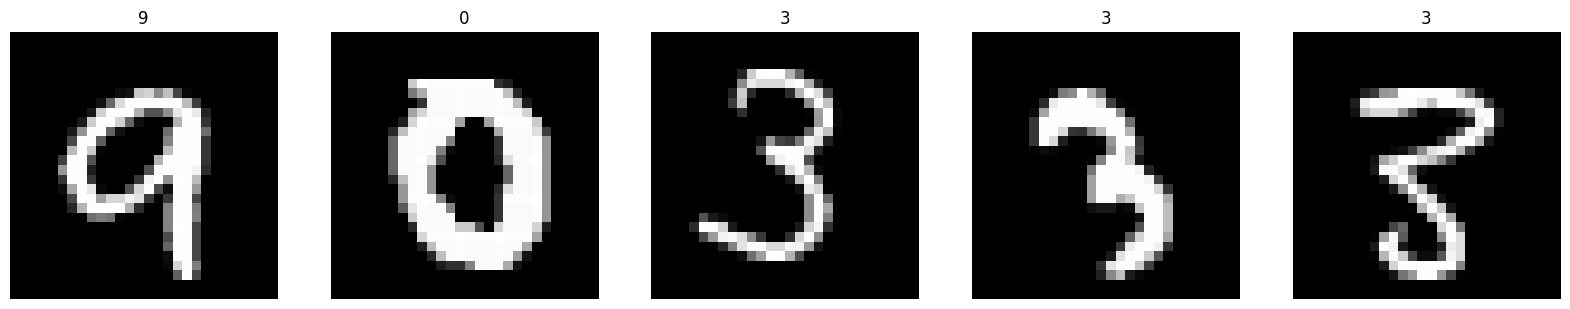

In [8]:
num_images = 5

fig, axes = plt.subplots(1, num_images, figsize=(20,20))
for i in range(num_images):
    sample = np.random.randint(0, x_train.shape[0])
    axes[i].imshow(x_train[sample], cmap='gray')
    axes[i].set_title(y_train[sample])
    axes[i].axis('off')
plt.show()

### Exercise 1(d) (10 points)

Build a deep neural network as follows:

- Reshape the input features. Use 784.
- Standardize the input features. Divide the input values by 255.
- Change the digit labels to 0-1 encoding.
- Build a deep neural network with 2 layers with 128 neurons. Use `relu` as the activation function in the hidden layers and `softmax` as the activation function in the output.
- Compile the network with the following:
    - `optimizer='adam'`
    - `loss='categorical_crossentropy'`
    - `metrics=['accuracy']`
- Train the deep neural network with `epochs=50`, `batch_size=128`, and `validation_split=0.2`.
- Evaluate the model in the `test` data set. 

In [27]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train = x_train / 255
x_test = x_test / 255

y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

md1 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(784,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
md1.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

md1.fit(x_train, y_train, epochs = 50, batch_size = 128, validation_split = 0.2)


Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8143 - loss: 0.6575 - val_accuracy: 0.9523 - val_loss: 0.1622
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9565 - loss: 0.1460 - val_accuracy: 0.9629 - val_loss: 0.1216
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9706 - loss: 0.0975 - val_accuracy: 0.9647 - val_loss: 0.1119
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9785 - loss: 0.0702 - val_accuracy: 0.9696 - val_loss: 0.0992
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9830 - loss: 0.0548 - val_accuracy: 0.9721 - val_loss: 0.0959
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9882 - loss: 0.0412 - val_accuracy: 0.9714 - val_loss: 0.0930
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9908 - loss: 0.0314 - val_accuracy: 0.9735 - val_loss: 0.0964
Epoch 8/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9925 - loss: 0.0253 - val_accuracy: 0.

In [28]:
test_loss, test_acc = md1.evaluate(x_test, y_test)
print(test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9760 - loss: 0.1644
0.9797999858856201


# Exercise 2 

In this exercise, we will build a Convolutional Neural Network (CNN) to predict digit labels on the popular `mnist` data set.

### Exercise 2(a) (3 points)

Load the `mnist` data as `train` and `test` data sets.

In [19]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

### Exercise 2(b) (12 points)

Build a CNN model as follows:

- Change the digit labels to 0-1 encoding.
- The CNN model should have the following layers in the given order:
    - `Conv2D` with 32 filters, `kernel_size=(3,3)` and `activation=relu`
    - `MaxPooling2D` with `pool_size=(2,2)`
    - `Conv2D` with 64 filters, `kernel_size=(3,3)` and `activation=relu`
    - `MaxPooling2D` with `pool_size=(2,2)`
    - `Flatten`
    - `Dense` with 128 neurons and `activation=relu`
    - `Dense` with 10 neurons and `activation=softmax`
- Compile the network with the following:
    - `optimizer='adam'`
    - `loss='categorical_crossentropy'`
    - `metrics=['accuracy']`
- Train the deep neural network with `epochs=50`, `batch_size=128`, and `validation_split=0.1`.
- Evaluate the model on the `test` data set.


In [20]:
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

md2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2)),
    tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])

md2.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

md2.fit(x_train, y_train, epochs = 50, batch_size = 128, validation_split = 0.2)

Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.7843 - loss: 4.4729 - val_accuracy: 0.9725 - val_loss: 0.0942
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9751 - loss: 0.0774 - val_accuracy: 0.9790 - val_loss: 0.0730
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9871 - loss: 0.0422 - val_accuracy: 0.9766 - val_loss: 0.0863
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.9901 - loss: 0.0301 - val_accuracy: 0.9830 - val_loss: 0.0613
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9921 - loss: 0.0226 - val_accuracy: 0.9810 - val_loss: 0.0751
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9925 - loss: 0.0212 - val_accuracy: 0.9833 - val_loss: 0.0689
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.9941 - loss: 0.0162 - val_accuracy: 0.9828 - val_loss: 0.0844
Epoch 8/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9928 - loss: 0.0187 - val_accu

In [22]:
test_loss, test_acc = md2.evaluate(x_test, y_test, verbose = 0)
print(test_acc)

0.9878000020980835
